In [46]:
rm(list=ls())

In [47]:
#Calculate Alpha and Beta Diversity with Only Bacteria and Fungi
#Read in Taxonomic Data for each Tax ID
TaxID_VAP_MetaData <- read.csv("TaxaData_VAP_MetaDataOnly.csv", header=TRUE, sep=",")
IDSeq_Outputs <- read.csv("IDSeq_VAP_MetaDataOnly.csv", header=TRUE)

levels(TaxID_VAP_MetaData$kingdom)
virus_kingdoms <- c('Bamfordvirae','Orthornavirae','Sangervirae','Shotokuvirae','Viridiplantae')
TaxID_VAP_MetaData$viridae <- grepl("viridae", TaxID_VAP_MetaData$family)
virus_families <- subset(TaxID_VAP_MetaData, TaxID_VAP_MetaData$viridae=="TRUE")
unique(virus_families$family)
fungi_protozoa_kingdoms <- c("Fungi","Metazoa")

[1] "<not present>" "Bamfordvirae"  "Fungi"         "Metazoa"      
[5] "Orthornavirae" "Sangervirae"   "Shotokuvirae"  "Viridiplantae"

[1] Coronaviridae     Orthomyxoviridae  Herpesviridae     Pneumoviridae    
 [5] Papillomaviridae  Myoviridae        Adenoviridae      Totiviridae      
 [9] Virgaviridae      Siphoviridae      Anelloviridae     Potyviridae      
[13] Paramyxoviridae   Bromoviridae      Mitoviridae       Botourmiaviridae 
[17] Alphaflexiviridae Endornaviridae    Baculoviridae     Ackermannviridae 
[21] Podoviridae       Autographiviridae Polymycoviridae   Partitiviridae   
[25] Microviridae      Herelleviridae   
557 Levels: <not present> Acanthamoebidae ... Zosteraceae

In [48]:
#Add the Taxonomic Data to the IDSeq_Outputs
library(dplyr)
IDSeq_Taxa_VAP_MetaData <- inner_join(IDSeq_Outputs,TaxID_VAP_MetaData,by="tax_id")

#Select Viruses
IDSeq_VAP_MetaData_viruses <- subset(IDSeq_Taxa_VAP_MetaData, IDSeq_Taxa_VAP_MetaData$family %in% virus_families)
write.csv(IDSeq_VAP_MetaData_viruses, "IDSeq_VAP_MetaData_viruses.csv", row.names=FALSE, quote=FALSE)

#Select Fungi and Protozoa
IDSeq_VAP_MetaData_fungiprotozoa <- subset(IDSeq_Taxa_VAP_MetaData, IDSeq_Taxa_VAP_MetaData$kingdom %in% fungi_protozoa_kingdoms)
write.csv(IDSeq_VAP_MetaData_fungiprotozoa, "IDSeq_VAP_MetaData_fungiprotozoa.csv", row.names=FALSE, quote=FALSE)

#Exclude Viruses !(y %in% a$x)
`%notin%` <- Negate(`%in%`)
IDSeq_VAP_MetaData_noviruses <- subset(IDSeq_Taxa_VAP_MetaData, IDSeq_Taxa_VAP_MetaData$family %notin% virus_families$family)
unique(IDSeq_VAP_MetaData_noviruses$family)
write.csv(IDSeq_VAP_MetaData_noviruses, "IDSeq_VAP_MetaData_noviruses.csv", row.names=FALSE, quote=FALSE)


[1] Actinomycetaceae                                 
  [2] Mycoplasmataceae                                 
  [3] Apogonidae                                       
  [4] Prevotellaceae                                   
  [5] Verbenaceae                                      
  [6] Veillonellaceae                                  
  [7] Poaceae                                          
  [8] Mycobacteriaceae                                 
  [9] Dacryobolaceae                                   
 [10] Streptococcaceae                                 
 [11] <not present>                                    
 [12] Bifidobacteriaceae                               
 [13] Lactobacillaceae                                 
 [14] Bacteroidaceae                                   
 [15] Burkholderiaceae                                 
 [16] Pseudomonadaceae                                 
 [17] Sphingomonadaceae                                
 [18] Alteromonadaceae                                 
 [19] Brevibacteriaceae                                
 [20] Moraxellaceae                                    
 [21] Weeksellaceae                                    
 [22] Schizophyllaceae                                 
 [23] Corynebacteriaceae                               
 [24] Deinococcaceae                                   
 [25] Hypocreaceae                                     
 [26] Flavobacteriaceae                                
 [27] Rhizobiaceae                                     
 [28] Porphyromonadaceae                               
 [29] Blattabacteriaceae                               
 [30] Leptotrichiaceae                                 
 [31] Aphididae                                        
 [32] Cellvibrionaceae                                 
 [33] Campylobacteraceae                               
 [34] Gordoniaceae                                     
 [35] Sphingobacteriaceae                              
 [36] Saccotheciaceae                                  
 [37] Pasteurellaceae                                  
 [38] Cordycipitaceae                                  
 [39] Leuconostocaceae                                 
 [40] Tannerellaceae                                   
 [41] Cladosporiaceae                                  
 [42] Clostridiaceae                                   
 [43] Aurantimonadaceae                                
 [44] Enterobacteriaceae                               
 [45] Legionellaceae                                   
 [46] Hyphomicrobiaceae                                
 [47] Archangiaceae                                    
 [48] Promicromonosporaceae                            
 [49] Phyllobacteriaceae                               
 [50] Jiangellaceae                                    
 [51] Xanthomonadaceae                                 
 [52] Xanthobacteraceae                                
 [53] Chelatococcaceae                                 
 [54] Nocardioidaceae                                  
 [55] Bradyrhizobiaceae                                
 [56] Planctomycetaceae                                
 [57] Staphylococcaceae                                
 [58] Intrasporangiaceae                               
 [59] Aeromonadaceae                                   
 [60] Brucellaceae                                     
 [61] Comamonadaceae                                   
 [62] Lachnospiraceae                                  
 [63] Methylobacteriaceae                              
 [64] Propionibacteriaceae                             
 [65] Tsukamurellaceae                                 
 [66] Microbacteriaceae                                
 [67] Morganellaceae                                   
 [68] Sporidiobolaceae                                 
 [69] Debaryomycetaceae                                
 [70] Pleosporaceae                                    
 [71] Sphaerobacteraceae                               
 [72] Bacillaceae         

In [49]:
#Calculate Alpha and Beta Diversity for Bacteria, Fungi, Protozoa
IDSeq_VAP_noviruses <- read.csv("IDSeq_VAP_MetaData_noviruses.csv", header=TRUE)
IDSeq_Taxa_R <- IDSeq_VAP_noviruses[,c(4,1,6,16,24:30)]

#Reduce the Matrix to Include only the IDSeq_Name, nt_rpm, and genus
IDSeq_Genus <- IDSeq_Taxa_R[,c(2,4,10)]

#Summarize by Genus for Each Sample
IDSeq_Genus_Summ <- IDSeq_Genus %>% group_by(IDSeq_Name,genus) %>% summarise(nt_rpm=sum(nt_rpm))
dim(IDSeq_Genus)
dim(IDSeq_Genus_Summ)
head(IDSeq_Genus_Summ)
write.csv(IDSeq_Genus_Summ,"IDSeq_VAP_byGenus_noviruses.csv", row.names=FALSE, quote=FALSE)

`summarise()` regrouping output by 'IDSeq_Name' (override with `.groups` argument)



[1] 176504      3

[1] 10826     3

IDSeq_Name,genus,nt_rpm
<fct>,<fct>,<dbl>
RR100e_00001,<not present>,0.9081311
RR100e_00001,Acinetobacter,13.2091792
RR100e_00001,Aggregatibacter,11.8882612
RR100e_00001,Alloscardovia,5.7790159
RR100e_00001,Alteromonas,0.9081311
RR100e_00001,Archangium,0.3302295


In [50]:
#Take the Genus Data by Sample and Calculate the Alpha Diversity
IDSeq_Genus <- read.csv("IDSeq_VAP_byGenus_noviruses.csv", sep=",",header=TRUE)
head(IDSeq_Genus)

#Load required Library
library(tidyr)

#Make a Matrix of Genus x IDSeq_Name
IDSeq_Genus_Wide <- spread(IDSeq_Genus,genus, nt_rpm)
IDSeq_Genus_Wide[is.na(IDSeq_Genus_Wide)]<-0

#Save the Matrix
write.csv(IDSeq_Genus_Wide,"IDSeq_Wide_VAP_MetaData_noviruses.csv", row.names=FALSE, quote=FALSE)

#Rename Rows as Sample Names
row.names(IDSeq_Genus_Wide) <- IDSeq_Genus_Wide$IDSeq_Name
dim(IDSeq_Genus_Wide)
IDSeq_Genus_Wide<-IDSeq_Genus_Wide[,c(2:1358)]
head(IDSeq_Genus_Wide)
names(IDSeq_Genus_Wide)

,IDSeq_Name,genus,nt_rpm
,<fct>,<fct>,<dbl>
1,RR100e_00001,<not present>,0.9081311
2,RR100e_00001,Acinetobacter,13.2091792
3,RR100e_00001,Aggregatibacter,11.8882612
4,RR100e_00001,Alloscardovia,5.7790159
5,RR100e_00001,Alteromonas,0.9081311
6,RR100e_00001,Archangium,0.3302295


[1]  140 1428

,<not present>,Abiotrophia,Absidia,Acanthamoeba,Acaryochloris,Acer,Acetoanaerobium,Acetobacter,Acetohalobium,Acetomicrobium,⋯,Tolumonas,Tolypothrix,Trabulsiella,Trametes,Tremella,Treponema,Tribolium,Trichoderma,Trichodesmium,Tricholoma
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RR100e_00001,0.9081311,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.0000000,0,0,0,1.2383605,0,0
RR100e_00002,0.0000000,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.0000000,0,0,0,0.0000000,0,0
RR100e_00003,6.4279698,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.3673126,0,0,0,0.5509688,0,0
RR100e_00004,23.7199186,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.0000000,0,0,0,0.0000000,0,0
RR100e_00005,17.6128603,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.0000000,0,0,0,0.0000000,0,0
RR100e_00006,0.0000000,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.0000000,0,0,0,0.0000000,0,0


[1] "<not present>"                    "Abiotrophia"                     
   [3] "Absidia"                          "Acanthamoeba"                    
   [5] "Acaryochloris"                    "Acer"                            
   [7] "Acetoanaerobium"                  "Acetobacter"                     
   [9] "Acetohalobium"                    "Acetomicrobium"                  
  [11] "Acholeplasma"                     "Achromobacter"                   
  [13] "Acidaminococcus"                  "Acidihalobacter"                 
  [15] "Acidimicrobium"                   "Acidiphilium"                    
  [17] "Acidipropionibacterium"           "Acidithiobacillus"               
  [19] "Acidothermus"                     "Acidovorax"                      
  [21] "Acinetobacter"                    "Actinoalloteichus"               
  [23] "Actinobacillus"                   "Actinobaculum"                   
  [25] "Actinomadura"                     "Actinomarinicola"                
  [27] "Actinomyces"                      "Actinoplanes"                    
  [29] "Actinopolymorpha"                 "Actinopolyspora"                 
  [31] "Actinosynnema"                    "Actinotalea"                     
  [33] "Actinotignum"                     "Acyrthosiphon"                   
  [35] "Adlercreutzia"                    "Aedes"                           
  [37] "Aegilops"                         "Aequorivita"                     
  [39] "Aeribacillus"                     "Aerococcus"                      
  [41] "Aeromicrobium"                    "Aeromonas"                       
  [43] "Aestuariimicrobium"               "Afipia"                          
  [45] "Agaricus"                         "Agarivorans"                     
  [47] "Aggregatibacter"                  "Agrilus"                         
  [49] "Agrobacterium"                    "Agrococcus"                      
  [51] "Agromyces"                        "Akkermansia"                     
  [53] "Alcaligenes"                      "Alcanivorax"                     
  [55] "Algoriphagus"                     "Alicycliphilus"                  
  [57] "Alicyclobacillus"                 "Aliivibrio"                      
  [59] "Alistipes"                        "Alkalihalobacillus"              
  [61] "Alkalilimnicola"                  "Alkalimonas"                     
  [63] "Alkaliphilus"                     "Alkalitalea"                     
  [65] "Alloactinosynnema"                "Allochromatium"                  
  [67] "Allokutzneria"                    "Alloprevotella"                  
  [69] "Alloscardovia"                    "Altererythrobacter"              
  [71] "Alternaria"                       "Alteromonas"                     
  [73] "Amantichitinum"                   "Amborella"                       
  [75] "Aminipila"                        "Aminobacter"                     
  [77] "Aminobacterium"                   "Ammonifex"                       
  [79] "Amphibacillus"                    "Amphimedon"                      
  [81] "Amycolatopsis"                    "Amyelois"                        
  [83] "Amylolactobacillus"               "Anabaena"                        
  [85] "Anabaenopsis"                     "Anaerobutyricum"                 
  [87] "Anaerococcus"                     "Anaeroglobus"                    
  [89] "Anaerohalosphaera"                "Anaerolinea"                     
  [91] "Anaeromyxobacter"                 "Anaerostipes"                    
  [93] "Anaerotignum"                     "Ananas"                          
  [95] "Ancylobacter"                     "Aneurinibacillus"                
  [97] "Annulohypoxylon"                  "Anoxybacillus"                   
  [99] "Aphanizomenon"                    "Aptenodytes"                     
 [101] "Aquabacterium"                    "Aquaspirillum"                   
 [103] "Aquincola"                        "Aquisphaera"                     

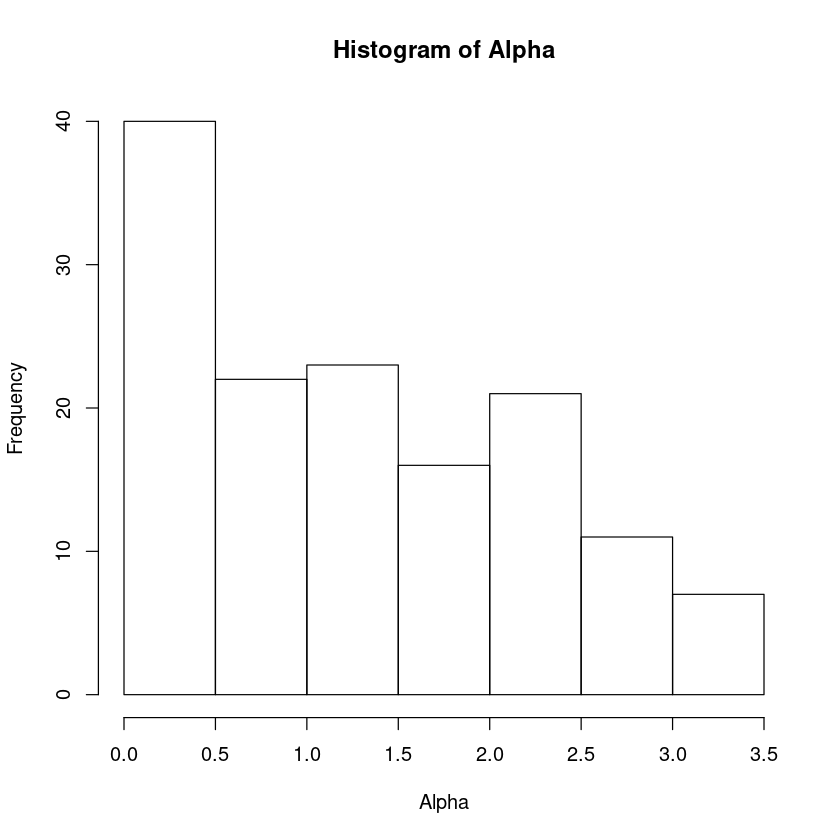

In [51]:
#Calculate the Alpha Diversity by Genus 
library(vegan)
Alpha <- diversity(IDSeq_Genus_Wide)
hist(Alpha)

In [52]:
#Summarize the Alpha Diversity by Sample
length(row.names(IDSeq_Genus_Wide))
Alpha_Table <- matrix(data = NA, nrow =  140, ncol =2,dimnames=list(c(1:140),c("IDSeq_Name","Alpha_byGenus")))
Alpha_Table[,c(1)] <- row.names(IDSeq_Genus_Wide)
Alpha_Table[,c(2)] <- Alpha

#Add the Alpha Diversity to the MetaData File
VAP_Samples_MetaData_R <- read.csv("VAP_Samples_MetaData_R.csv", header=TRUE)
VAP_Samples_MetaData_Alpha <- inner_join(VAP_Samples_MetaData_R,Alpha_Table,by="IDSeq_Name",copy=TRUE)
head(VAP_Samples_MetaData_Alpha)

[1] 140

,COMETID,IDSeq_Name,UCSF_MRN,DateCollected,DaysSinceCOVIDTest,DaysSinceAdmission,DaysSinceIntubation,VAP_CDC.x,VAP_onset,Sample_used_in_RNAseq,Timepoint_for_RNAseq,VAP_Organism1,VAP_Organism2,COVID_Status,Age_AtAdmission,Gender,Race,Ethnicity,Alpha_byGenus
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
1,1001,RR100e_00004,76706450,2020-04-12,9,7,7,N,,RR100e_00001,Early,,,Confirmed Positive,34,F,White,Not Hispanic,3.18807404680775
2,1001,RR100e_00002,76706450,2020-04-10,7,5,5,N,,RR100e_00001,Early,,,Confirmed Positive,34,F,White,Not Hispanic,1.41611037590824
3,1001,RR100e_00003,76706450,2020-04-11,8,6,6,N,,RR100e_00001,Early,,,Confirmed Positive,34,F,White,Not Hispanic,2.44646660102584
4,1001,RR100e_00006,76706450,2020-04-15,12,10,10,N,,RR100e_00001,Early,,,Confirmed Positive,34,F,White,Not Hispanic,0.660969316107709
5,1001,RR100e_00001,76706450,2020-04-09,6,4,4,N,,RR100e_00001,Early,,,Confirmed Positive,34,F,White,Not Hispanic,1.60762790884114
6,1001,RR100e_00005,76706450,2020-04-13,10,8,8,N,,RR100e_00001,Early,,,Confirmed Positive,34,F,White,Not Hispanic,0.834294133768801


In [53]:
#Calculate the Beta Diversity - BrayCurtis
Beta_BrayCurtis <- vegdist(IDSeq_Genus_Wide, method="bray")
mds_BrayCurtis <- metaMDS(Beta_BrayCurtis)

#Turn Output into DataFrame
mds_BrayCurtis_data <- as.data.frame(mds_BrayCurtis$points)
mds_BrayCurtis_data$IDSeq_Name<-rownames(mds_BrayCurtis_data)
head(mds_BrayCurtis_data)

#Combine MDS1 and MDS2 with MetaData 
VAP_Samples_BrayCurtis <- inner_join(VAP_Samples_MetaData_Alpha, mds_BrayCurtis_data, by="IDSeq_Name")
colnames(VAP_Samples_BrayCurtis)
write.csv(VAP_Samples_BrayCurtis,"VAP_Samples_NoViruses_Diversity.csv", quote=FALSE, row.names=FALSE)

Run 0 stress 0.2447135 
Run 1 stress 0.248983 
Run 2 stress 0.2361262 
... New best solution
... Procrustes: rmse 0.03148764  max resid 0.1925204 
Run 3 stress 0.2475024 
Run 4 stress 0.2435502 
Run 5 stress 0.2524642 
Run 6 stress 0.2415965 
Run 7 stress 0.2432313 
Run 8 stress 0.2461904 
Run 9 stress 0.2528289 
Run 10 stress 0.2406397 
Run 11 stress 0.2498292 
Run 12 stress 0.2450102 
Run 13 stress 0.2358335 
... New best solution
... Procrustes: rmse 0.01202492  max resid 0.1377442 
Run 14 stress 0.2400989 
Run 15 stress 0.2499266 
Run 16 stress 0.2452966 
Run 17 stress 0.2485136 
Run 18 stress 0.2402823 
Run 19 stress 0.2478412 
Run 20 stress 0.2546174 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


,MDS1,MDS2,IDSeq_Name
,<dbl>,<dbl>,<chr>
RR100e_00001,-0.07965170,-0.15262559,RR100e_00001
RR100e_00002,-0.21984275,-0.05827664,RR100e_00002
RR100e_00003,-0.20115539,0.03990901,RR100e_00003
RR100e_00004,-0.20293099,-0.01343834,RR100e_00004
RR100e_00005,0.06991975,-0.25624361,RR100e_00005
RR100e_00006,0.01149280,-0.28121363,RR100e_00006


[1] "COMETID"               "IDSeq_Name"            "UCSF_MRN"             
 [4] "DateCollected"         "DaysSinceCOVIDTest"    "DaysSinceAdmission"   
 [7] "DaysSinceIntubation"   "VAP_CDC.x"             "VAP_onset"            
[10] "Sample_used_in_RNAseq" "Timepoint_for_RNAseq"  "VAP_Organism1"        
[13] "VAP_Organism2"         "COVID_Status"          "Age_AtAdmission"      
[16] "Gender"                "Race"                  "Ethnicity"            
[19] "Alpha_byGenus"         "MDS1"                  "MDS2"

In [54]:
#Calculate Permanova for BrayCurtis
length(row.names(IDSeq_Genus_Wide))
VAP_SampleData <- read.csv("VAP_SampleData.csv", header=TRUE, row.names=1)
VAP_SampleData <- subset(VAP_SampleData, VAP_SampleData$IDSeq_Name %in% row.names(IDSeq_Genus_Wide))
dim(VAP_SampleData)
permanova <- adonis(IDSeq_Genus_Wide ~ VAP_CDC.x + DaysSinceIntubation, data=VAP_SampleData, strata=VAP_SampleData$COMETID, method="bray",perm=999)
permanova
write.csv(permanova$aov.tab,"GenusLevel_NoViruses-BrayCurtisPCOA.csv", quote=F, row.names=TRUE)

[1] 140

[1] 140   4


Call:
adonis(formula = IDSeq_Genus_Wide ~ VAP_CDC.x + DaysSinceIntubation,      data = VAP_SampleData, permutations = 999, method = "bray",      strata = VAP_SampleData$COMETID) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                     Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
VAP_CDC.x             1     1.557 1.55663  3.4261 0.02410  0.015 *
DaysSinceIntubation   1     0.799 0.79873  1.7580 0.01236  0.015 *
Residuals           137    62.244 0.45434         0.96354         
Total               139    64.600                 1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [1]:
#Add the UCSF Color Palatte
#HEX Codes for the UCSF Color Palatte
Navy <- "#052049"
Navy01 <- "#506380"
Blue <- "#178CCB"
Blue01 <- "#5DAFDB"
Orange <- "#F48024"
Orange01<- "#F7A665"
Cyan <- "#18A3AC"
Cyan01 <- "#5DBFC5"
Green <- "#90DB31"
Green01 <- "#B1D16F"
Purple <- "#716FB2"
Purple01 <- "#9C8AC9"
Pink <- "#EC1848"
Pink01 <- "#F25D7F"
Yellow <- "#FFDD00"
Yellow01 <- "#FFE74D"

In [1]:
#Alexandra's Color Scheme
VAP_early <- "#00BFFF"
NoVAP_early <- "#7CCD7C"
VAP_late <- "#FFB90F"
NoVAP_late <- "#EE6A50"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




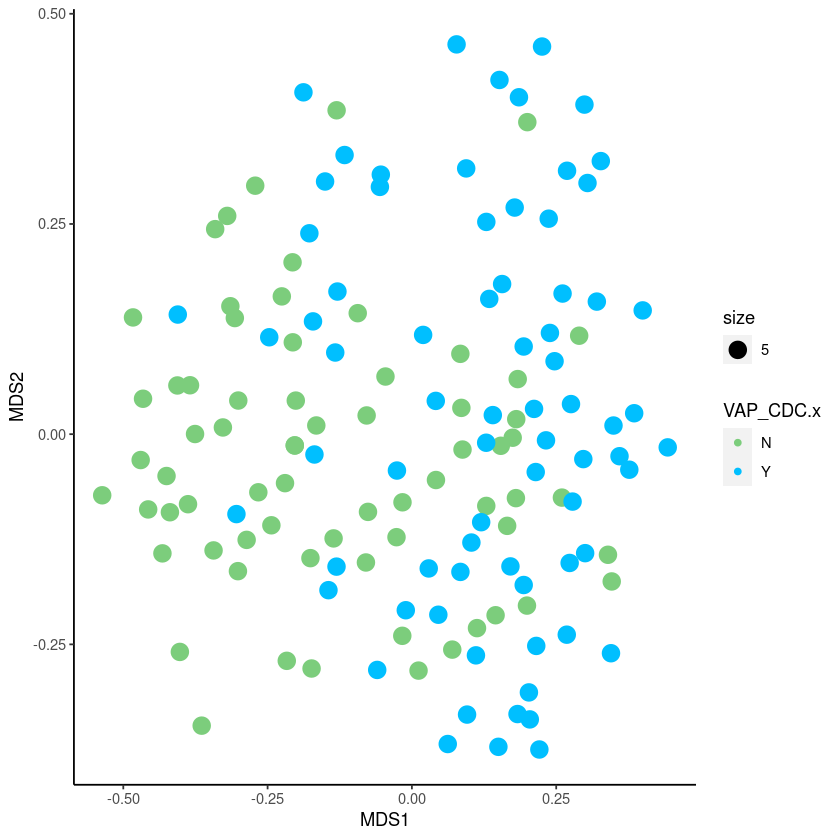

In [2]:
VAP_Samples_BrayCurtis <- read.csv("VAP_Samples_NoViruses_Diversity.csv", header=TRUE)
#Load libraries
library(ggplot2)
library(dplyr)

#Graph All Timepoints by VAP Status
Graph_VAP_BrayCurtis<-ggplot(VAP_Samples_BrayCurtis,aes(x=MDS1,y=MDS2))+
    geom_point(aes(x=MDS1,y=MDS2,color=VAP_CDC.x,size=5))+
    scale_color_manual(values=c(NoVAP_early,VAP_early))+
    theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    geom_text(x=-0.25, y=-0.5, label="ANOVA VAP R2=0.024, p=0.015")+
    geom_text(x=-0.25, y=-0.55, label="ANOVA Time R2=0.012, p=0.015")

Graph_VAP_BrayCurtis

ggsave(filename="Graph-BrayCurtisDiversity_noviruses.pdf", plot=Graph_VAP_BrayCurtis,  useDingbats=FALSE, width=8, height=8, units="in")

In [14]:
#Read in Data and Bin By Days since Intubation
VAP_Samples_NoVirus <- read.csv("VAP_Samples_NoViruses_Diversity.csv",header=TRUE)
head(VAP_Samples_NoVirus)

VAP_Samples_NoVirus$DaysSinceIntubation_Binned <- ifelse(VAP_Samples_NoVirus$DaysSinceIntubation<5,"0-4",
                                            ifelse(VAP_Samples_NoVirus$DaysSinceIntubation %in% 5:9,"5-9",
                                            ifelse(VAP_Samples_NoVirus$DaysSinceIntubation %in% 10:14,"10-20","20-35")))

VAP_Samples_NoVirus$DaysSinceIntubation_Binned <- factor(VAP_Samples_NoVirus$DaysSinceIntubation_Binned, levels = c("0-4","5-9","10-20","20-35"))
head(VAP_Samples_NoVirus)
#Summarisse the means for each sample by Bin and Graph
Binned_NoVirus <- VAP_Samples_NoVirus %>% group_by(COMETID,DaysSinceIntubation_Binned) %>% summarise(Alpha_mean = mean(na.omit(Alpha_byGenus)), 
                                                                                            MDS1_mean = mean(na.omit(MDS1)), MDS2_mean=mean(na.omit(MDS2)))
head(Binned_NoVirus)
VAP_byCOMETID <- unique(VAP_Samples_NoVirus[,c(1,8)])
head(VAP_byCOMETID)
Binned_NoVirus <- left_join(Binned_NoVirus, VAP_byCOMETID, by="COMETID")
write.csv(Binned_NoVirus,"NoViruses_Binned_Mean.csv", row.names=FALSE, quote=FALSE)

,COMETID,IDSeq_Name,UCSF_MRN,DateCollected,DaysSinceCOVIDTest,DaysSinceAdmission,DaysSinceIntubation,VAP_CDC.x,VAP_onset,Sample_used_in_RNAseq,⋯,VAP_Organism1,VAP_Organism2,COVID_Status,Age_AtAdmission,Gender,Race,Ethnicity,Alpha_byGenus,MDS1,MDS2
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1001,RR100e_00004,76706450,2020-04-12,9,7,7,N,,RR100e_00001,⋯,,,Confirmed Positive,34,F,White,Not Hispanic,3.1880740,-0.20293099,-0.01343834
2,1001,RR100e_00002,76706450,2020-04-10,7,5,5,N,,RR100e_00001,⋯,,,Confirmed Positive,34,F,White,Not Hispanic,1.4161104,-0.21984275,-0.05827664
3,1001,RR100e_00003,76706450,2020-04-11,8,6,6,N,,RR100e_00001,⋯,,,Confirmed Positive,34,F,White,Not Hispanic,2.4464666,-0.20115539,0.03990901
4,1001,RR100e_00006,76706450,2020-04-15,12,10,10,N,,RR100e_00001,⋯,,,Confirmed Positive,34,F,White,Not Hispanic,0.6609693,0.01149280,-0.28121363
5,1001,RR100e_00001,76706450,2020-04-09,6,4,4,N,,RR100e_00001,⋯,,,Confirmed Positive,34,F,White,Not Hispanic,1.6076279,-0.07965170,-0.15262559
6,1001,RR100e_00005,76706450,2020-04-13,10,8,8,N,,RR100e_00001,⋯,,,Confirmed Positive,34,F,White,Not Hispanic,0.8342941,0.06991975,-0.25624361


,COMETID,IDSeq_Name,UCSF_MRN,DateCollected,DaysSinceCOVIDTest,DaysSinceAdmission,DaysSinceIntubation,VAP_CDC.x,VAP_onset,Sample_used_in_RNAseq,⋯,VAP_Organism2,COVID_Status,Age_AtAdmission,Gender,Race,Ethnicity,Alpha_byGenus,MDS1,MDS2,DaysSinceIntubation_Binned
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,1001,RR100e_00004,76706450,2020-04-12,9,7,7,N,,RR100e_00001,⋯,,Confirmed Positive,34,F,White,Not Hispanic,3.1880740,-0.20293099,-0.01343834,5-9
2,1001,RR100e_00002,76706450,2020-04-10,7,5,5,N,,RR100e_00001,⋯,,Confirmed Positive,34,F,White,Not Hispanic,1.4161104,-0.21984275,-0.05827664,5-9
3,1001,RR100e_00003,76706450,2020-04-11,8,6,6,N,,RR100e_00001,⋯,,Confirmed Positive,34,F,White,Not Hispanic,2.4464666,-0.20115539,0.03990901,5-9
4,1001,RR100e_00006,76706450,2020-04-15,12,10,10,N,,RR100e_00001,⋯,,Confirmed Positive,34,F,White,Not Hispanic,0.6609693,0.01149280,-0.28121363,10-20
5,1001,RR100e_00001,76706450,2020-04-09,6,4,4,N,,RR100e_00001,⋯,,Confirmed Positive,34,F,White,Not Hispanic,1.6076279,-0.07965170,-0.15262559,0-4
6,1001,RR100e_00005,76706450,2020-04-13,10,8,8,N,,RR100e_00001,⋯,,Confirmed Positive,34,F,White,Not Hispanic,0.8342941,0.06991975,-0.25624361,5-9


`summarise()` regrouping output by 'COMETID' (override with `.groups` argument)



COMETID,DaysSinceIntubation_Binned,Alpha_mean,MDS1_mean,MDS2_mean
<int>,<fct>,<dbl>,<dbl>,<dbl>
1001,0-4,1.6076279,-0.0796517,-0.15262559
1001,5-9,1.9712363,-0.1385023,-0.07201240
1001,10-20,0.6609693,0.0114928,-0.28121363
1002,0-4,2.1011813,-0.1595885,-0.17101312
1002,5-9,1.9929224,-0.2834263,-0.01457941
1038,5-9,1.9703197,-0.1686539,0.01773995


,COMETID,VAP_CDC.x
,<int>,<fct>
1,1001,N
7,1002,N
12,1038,N
14,1072,N
33,1115,N
47,1136,N


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
VAP_CDC.x,1,0.59866542,0.59866542,15.1888144,0.0004064152
DaysSinceIntubation_Binned,3,0.20534154,0.06844718,1.7365819,0.1768705837
VAP_CDC.x:DaysSinceIntubation_Binned,3,0.04613571,0.01537857,0.3901716,0.7607704107
Residuals,36,1.41893597,0.03941489,NA,NA


Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”


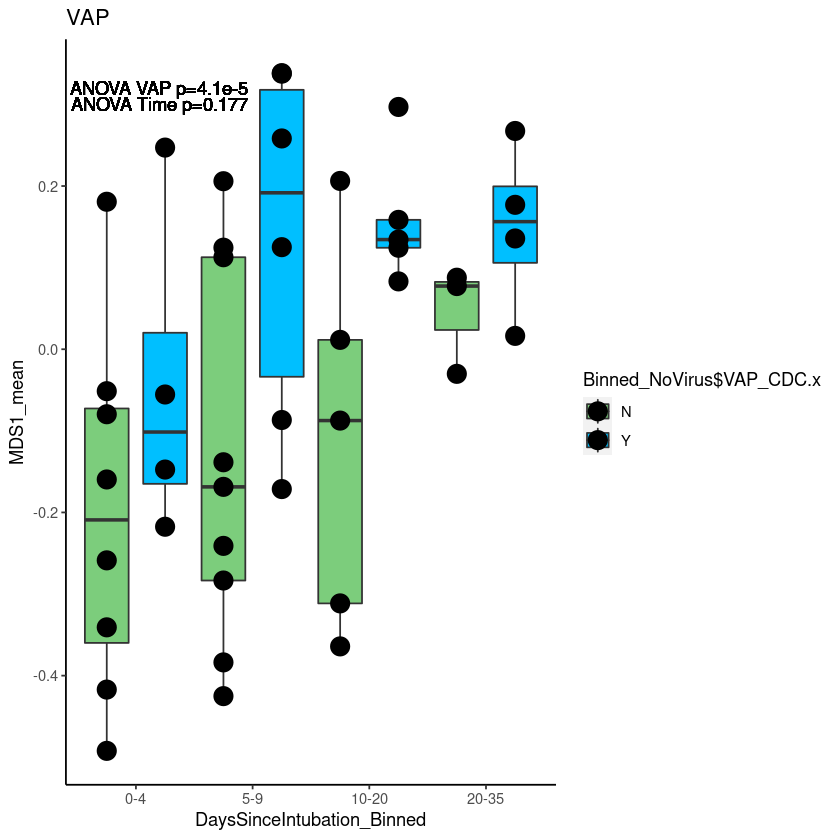

In [3]:
#Read in Data and Graph BrayCurtis Beta Diversity
Binned_NoVirus <- read.csv("NoViruses_Binned_Mean.csv", header=TRUE)

Binned_NoVirus$DaysSinceIntubation_Binned <- factor(Binned_NoVirus$DaysSinceIntubation_Binned, levels = c("0-4","5-9","10-20","20-35"))

#Anova requires the following assumption
## No extreme outliers 
## Normal Distribution

TwoWayAnova_NoVirus <- lm(MDS1_mean~VAP_CDC.x*DaysSinceIntubation_Binned,data=Binned_NoVirus)
anova(TwoWayAnova_NoVirus)

# Make a graph of the Means with the Bins Side By Side
BrayCurtis_Binned <- ggplot(Binned_NoVirus, aes(x=DaysSinceIntubation_Binned,y=MDS1_mean))+
    geom_boxplot(aes(fill=Binned_NoVirus$VAP_CDC.x),position=position_dodge(1))+
    geom_jitter(aes(fill=Binned_NoVirus$VAP_CDC.x),position=position_dodge(1),size=5)+
    labs(title="VAP")+
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    scale_fill_manual(values=c(NoVAP_early,VAP_early))+
    geom_text(x=1.2, y=0.32, label="ANOVA VAP p=4.1e-5")+
    geom_text(x=1.2, y=0.30, label="ANOVA Time p=0.177")

BrayCurtis_Binned
ggsave(filename="/wynton/group/lynch/Shared/COMET_ER_SRL/Graph-BrayCurtisDiversity_noViruses_Binned.pdf", plot=BrayCurtis_Binned,  useDingbats=FALSE, width=11, height=6, units="in")
ggsave(filename="Graph-BrayCurtisDiversity_noViruses_Binned.pdf", plot=BrayCurtis_Binned,  useDingbats=FALSE, width=11, height=6, units="in")


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
VAP_CDC.x,1,0.12397848,0.12397848,4.8637468,0.03389824
DaysSinceIntubation_Binned,3,0.02298036,0.00766012,0.3005109,0.82479314
VAP_CDC.x:DaysSinceIntubation_Binned,3,0.03868181,0.01289394,0.5058365,0.68071685
Residuals,36,0.91765168,0.02549032,NA,NA


Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”


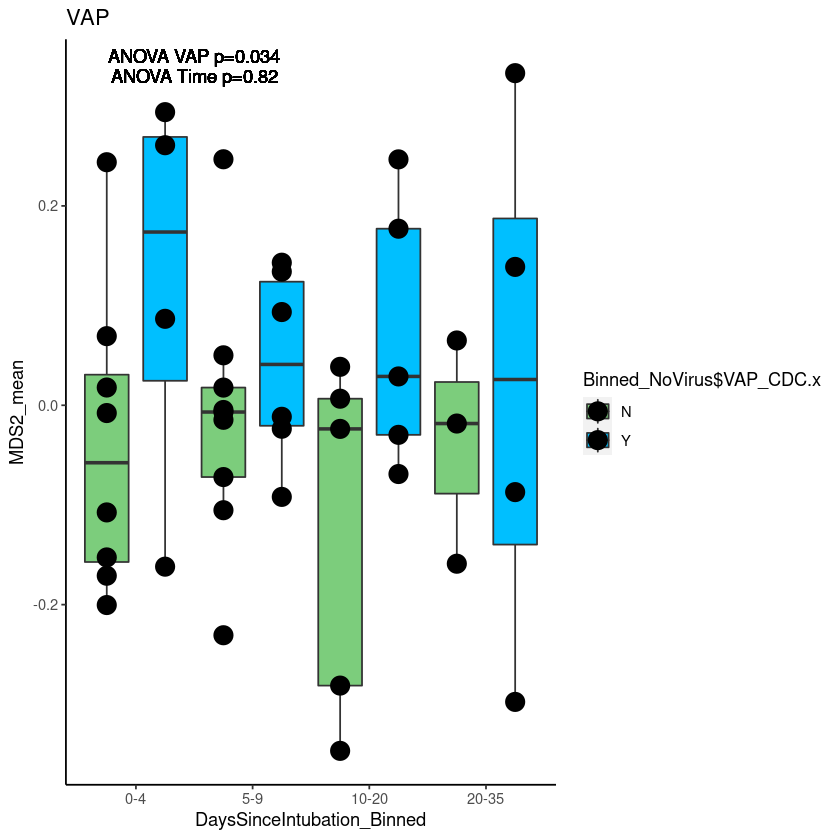

In [4]:
#Read in Data and Graph BrayCurtis Beta Diversity 
#GRAPH MDS2
Binned_NoVirus <- read.csv("NoViruses_Binned_Mean.csv", header=TRUE)
Binned_NoVirus$DaysSinceIntubation_Binned <- factor(Binned_NoVirus$DaysSinceIntubation_Binned, levels = c("0-4","5-9","10-20","20-35"))

library(ggplot2)
#Anova requires the following assumption
## No extreme outliers 
## Normal Distribution

TwoWayAnova_NoVirus <- lm(MDS2_mean~VAP_CDC.x*DaysSinceIntubation_Binned,data=Binned_NoVirus)
anova(TwoWayAnova_NoVirus)

# Make a graph of the Means with the Bins Side By Side
BrayCurtis_Binned_MDS2 <- ggplot(Binned_NoVirus, aes(x=DaysSinceIntubation_Binned,y=MDS2_mean))+
    geom_boxplot(aes(fill=Binned_NoVirus$VAP_CDC.x),position=position_dodge(1))+
    geom_jitter(aes(fill=Binned_NoVirus$VAP_CDC.x),position=position_dodge(1),size=5)+
    labs(title="VAP")+
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    scale_fill_manual(values=c(NoVAP_early,VAP_early))+
    geom_text(x=1.5, y=0.35, label="ANOVA VAP p=0.034")+
    geom_text(x=1.5, y=0.33, label="ANOVA Time p=0.82")

BrayCurtis_Binned_MDS2
ggsave(filename="/wynton/group/lynch/Shared/COMET_ER_SRL/Graph-BrayCurtisDiversity_MDS2_noViruses_Binned.pdf", plot=BrayCurtis_Binned_MDS2,  useDingbats=FALSE, width=11, height=6, units="in")
ggsave(filename="Graph-BrayCurtisDiversity_MDS2_noViruses_Binned.pdf", plot=BrayCurtis_Binned_MDS2,  useDingbats=FALSE, width=11, height=6, units="in")


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
VAP_CDC.x,1,5.0967876,5.0967876,9.6673354,0.003655705
DaysSinceIntubation_Binned,3,3.1828196,1.0609399,2.0123384,0.129557086
VAP_CDC.x:DaysSinceIntubation_Binned,3,0.9022885,0.3007628,0.5704721,0.638079672
Residuals,36,18.9798271,0.5272174,NA,NA


Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”
Warning message:
“Use of `Binned_NoVirus$VAP_CDC.x` is discouraged. Use `VAP_CDC.x` instead.”


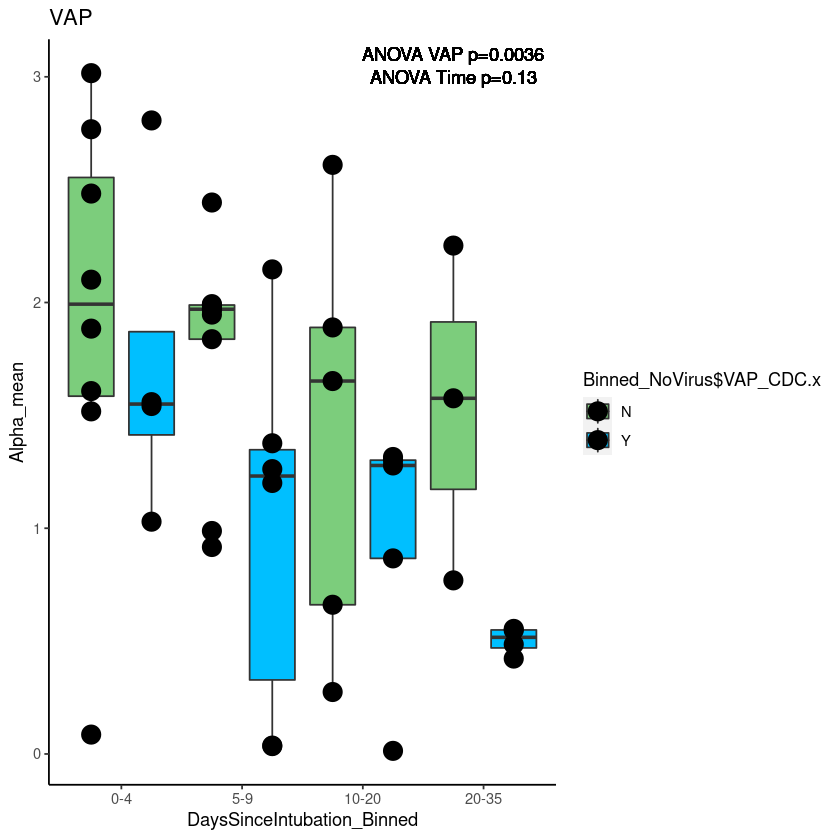

In [5]:
#Anova requires the following assumption
Binned_NoVirus <- read.csv("NoViruses_Binned_Mean.csv", header=TRUE)
Binned_NoVirus$DaysSinceIntubation_Binned <- factor(Binned_NoVirus$DaysSinceIntubation_Binned, levels = c("0-4","5-9","10-20","20-35"))

## No extreme outliers - Drop 1158 0-4
#Binned_NoVirus <- Binned_NoVirus[c(1:25,27:44),]
## Normal Distribution


TwoWayAnova_NoVirus <- lm(Alpha_mean~VAP_CDC.x*DaysSinceIntubation_Binned,data=Binned_NoVirus)
anova(TwoWayAnova_NoVirus)

library(ggplot2)
# Make a graph of the Means with the Bins Side By Side
Alpha_Binned <- ggplot(Binned_NoVirus, aes(x=DaysSinceIntubation_Binned,y=Alpha_mean))+
    geom_boxplot(aes(fill=Binned_NoVirus$VAP_CDC.x),position=position_dodge(1))+
    geom_jitter(aes(fill=Binned_NoVirus$VAP_CDC.x),position=position_dodge(1),size=5)+
    labs(title="VAP")+
        theme(axis.line = element_line(colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
    scale_fill_manual(values=c(NoVAP_early,VAP_early))+
    geom_text(x=3.75, y=3.1, label="ANOVA VAP p=0.0036")+
    geom_text(x=3.75, y=3, label="ANOVA Time p=0.13")

Alpha_Binned
ggsave(filename="/wynton/group/lynch/Shared/COMET_ER_SRL/Graph-AlphaDiversity_noViruses_Binned.pdf", plot=Alpha_Binned,  useDingbats=FALSE, width=11, height=6, units="in")
ggsave(filename="Graph-AlphaDiversity_noViruses_Binned.pdf", plot=Alpha_Binned,  useDingbats=FALSE, width=11, height=6, units="in")


[1] "COMETID"               "IDSeq_Name"            "UCSF_MRN"             
 [4] "DateCollected"         "DaysSinceCOVIDTest"    "DaysSinceAdmission"   
 [7] "DaysSinceIntubation"   "VAP_CDC.x"             "VAP_onset"            
[10] "Sample_used_in_RNAseq" "Timepoint_for_RNAseq"  "VAP_Organism1"        
[13] "VAP_Organism2"         "COVID_Status"          "Age_AtAdmission"      
[16] "Gender"                "Race"                  "Ethnicity"            
[19] "Alpha_byGenus"         "MDS1"                  "MDS2"

[1] 142  84

,COMETID.x,IDSeq_Name,UCSF_MRN,DateCollected,DaysSinceCOVIDTest,DaysSinceAdmission,DaysSinceIntubation,VAP_CDC.x,VAP_onset,Sample_used_in_RNAseq,⋯,BSI_CDC,BSI_CDC_date,BSI_CDC_org,COVID_1stTest,TestType,COVID_1stTest_Results,Intube_Date2,Male,White,Latino
,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
1,1001,RR100e_00004,76706450,2020-04-12,9,7,7,N,,RR100e_00001,⋯,N,,,2020-04-03,OSH - Doctors Modesto,Positive,NA,N,N,N
2,1001,RR100e_00004,76706450,2020-04-12,9,7,7,N,,RR100e_00001,⋯,N,,,2020-07-07,OP ZSFG,Positive,NA,N,N,N
3,1001,RR100e_00002,76706450,2020-04-10,7,5,5,N,,RR100e_00001,⋯,N,,,2020-04-03,OSH - Doctors Modesto,Positive,NA,N,N,N
4,1001,RR100e_00003,76706450,2020-04-11,8,6,6,N,,RR100e_00001,⋯,N,,,2020-04-03,OSH - Doctors Modesto,Positive,NA,N,N,N
5,1001,RR100e_00006,76706450,2020-04-15,12,10,10,N,,RR100e_00001,⋯,N,,,2020-04-03,OSH - Doctors Modesto,Positive,NA,N,N,N
6,1001,RR100e_00001,76706450,2020-04-09,6,4,4,N,,RR100e_00001,⋯,N,,,2020-04-03,OSH - Doctors Modesto,Positive,NA,N,N,N


[1] "numeric"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



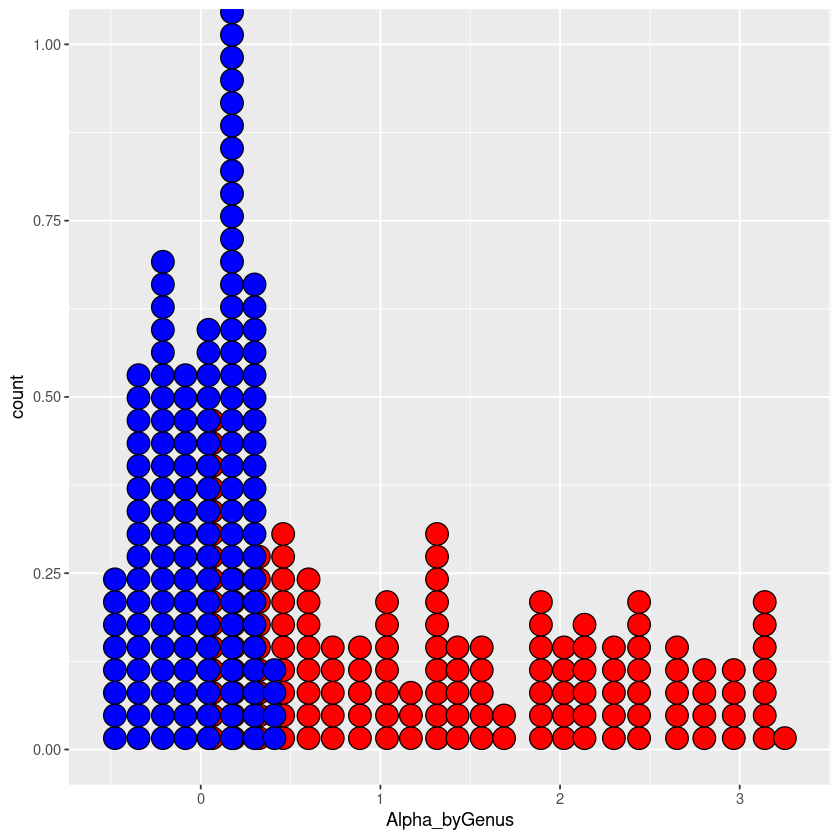

In [18]:
#Read in VAP_Samples_NoViruses
VAP_Samples_NoVirus <- read.csv("VAP_Samples_NoViruses_Diversity.csv",header=TRUE)
colnames(VAP_Samples_NoVirus)
#Read in all the MetaData
VAP_Samples_MetaData <- read.csv("VAP_Samples_MetaData.csv", header=TRUE)
dim(VAP_Samples_MetaData)
VAP_Samples_MetaData_Other <- VAP_Samples_MetaData[,c(1,9,19:81)]

library(dplyr)
VAP_Samples_NoVirus_withData <- left_join(VAP_Samples_NoVirus,VAP_Samples_MetaData_Other, by="IDSeq_Name")
VAP_Samples_NoVirus_withData$Male <- ifelse(VAP_Samples_NoVirus_withData$Gender=="M","Y","N")
VAP_Samples_NoVirus_withData$White <- ifelse(VAP_Samples_NoVirus_withData$Race=="White","Y","N")
VAP_Samples_NoVirus_withData$Latino <- ifelse(VAP_Samples_NoVirus_withData$Ethnicity=="Hispanic/Latino","Y","N")
VAP_Samples_NoVirus_withData$Steroids <- ifelse(VAP_Samples_NoVirus_withData$Steroids=="N","N","Y")

head(VAP_Samples_NoVirus_withData)

#Run Regression Determine which Variables Predict VAP 
#Start by Graphing Distributions 
library(ggplot2)
class(VAP_Samples_NoVirus_withData$Alpha_byGenus)
Visualize<-ggplot(VAP_Samples_NoVirus_withData, position="dodge")+
  geom_dotplot(aes(x=Alpha_byGenus), fill="RED", width=0.3)+
  geom_dotplot(aes(x=MDS1),fill="blue", width=0.3)
Visualize

In [19]:
#Select Additional Metadata Factors 
CountData <- VAP_Samples_NoVirus_withData[,c('COMETID.x', 'VAP_CDC.x','Male','White','Latino','Death','Obese','MorbidObese','Pregnant','DM','HTN','COPD','ASA','InhaledCS','Cancer','Immunosuppressed','Autoimmune','Transplant','Smoker','Remdesivir','Steroids','Pressors','Proning','iNO','ECMO','Thrombosis')]
CountData_unique <- CountData[!duplicated(CountData$COMETID.x),]
CountData_values <- ifelse(CountData_unique[,c('Male','White','Latino','Death','Obese','MorbidObese','Pregnant','DM','HTN','COPD','ASA','InhaledCS','Cancer','Immunosuppressed','Autoimmune','Transplant','Smoker','Remdesivir','Steroids','Pressors','Proning','iNO','ECMO','Thrombosis')]=="Y",1,0)

CountData_values<- cbind(CountData_unique[,c("COMETID.x","VAP_CDC.x")],CountData_values)

In [20]:
Input<-CountData_values

RiskFactors <- names(Input[,c(3:26)])

Summary <- matrix(data=NA, nrow=2, ncol=24,dimnames=list(c("N","Percent"),c(1:24)))
for (i in 1:24){
     var <- RiskFactors[i]
     Summary[1,(i)] <- sum(Input[,var])
     Summary[2,(i)] <- 100*sum(Input[,var])/length(Input[,var])  
     colnames(Summary) <- paste0(RiskFactors,".Summary")
}   
t(Summary)

#Get rid of Variables based on Low Frequency: White, Death, MorbidObese,Pregnant,COPD,Cancer,Autoimmune,Remdesivir, Pressors Transplant,iNO, ECMO
FINAL_CAT <-c('Male','Latino','Obese','ASA','Immunosuppressed','Steroids','Proning')

,N,Percent
Male.Summary,10,58.823529
White.Summary,2,11.764706
Latino.Summary,11,64.705882
Death.Summary,2,11.764706
Obese.Summary,12,70.588235
MorbidObese.Summary,3,17.647059
Pregnant.Summary,3,17.647059
DM.Summary,9,52.941176
HTN.Summary,6,35.294118
COPD.Summary,1,5.882353


In [1]:
#Simple Logistical Regression#
SimpleLogReg <- function(Outcome,IndependentVariable){
  model = glm(Outcome ~ IndependentVariable, 
              data = Input, 
              family = binomial(link="logit"))
  summary<-summary(model)
  coefficients <- summary$coefficients
  Estimate <- coefficients[c(2),c(1)]
  Error <- coefficients[c(2),c(2)]
  Pvalue <- coefficients[c(2),c(4)]
  OR <- exp(Estimate)
  lower <- exp(Estimate-1.96*Error)
  upper <- exp(Estimate+1.96*Error)
  Output <- matrix(data = NA, nrow =  6, ncol = 1, dimnames=list(c("Estimate","Error","OR","OR lower", "OR upper","pvalue"), c(1)))
  Output[1,1] <- Estimate
  Output[2,1] <- Error
  Output[3,1] <- OR
  Output[4,1] <- lower
  Output[5,1] <- upper
  Output[6,1] <- Pvalue
  return(Output)
}

In [22]:
#Run Simple Logistical Regression#
#Analyze Effect of Individual Variables on VAP_CDC.x#
Input <- VAP_Samples_NoVirus_withData

RiskFactors <- c('Alpha_byGenus','MDS1','DaysSinceIntubation','Age_AtAdmission','Male','Latino','Obese','ASA','Immunosuppressed','Steroids','Proning','APACHEIII_adm')
length(RiskFactors)

Output<- matrix(data = NA, nrow =  6, ncol = 12, dimnames=list(c("Estimate","Error","OR","OR lower", "OR upper","pvalue"),c(1:12)))

for (i in 1:12){
  var <- RiskFactors[i]
  Stats <- SimpleLogReg(Input$VAP_CDC.x, Input[,var])
  Output[,(i)] <- Stats
  colnames(Output) <- paste0(RiskFactors,"")
}
SimpLogReg_VAP <- as.data.frame(t(Output))
SimpLogReg_VAP$Sig <- ifelse(SimpLogReg_VAP$pvalue<0.05,"*","")
SimpLogReg_VAP

write.table(SimpLogReg_VAP,file="SimpLogReg_VAP.txt",sep="\t",quote=F,row.names=T)

#Identify Potentially Significant Associations#
Significant <- subset(SimpLogReg_VAP, pvalue<0.05)
Significant

[1] 12

,Estimate,Error,OR,OR lower,OR upper,pvalue,Sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alpha_byGenus,-1.14185095,0.218591453,0.3192276,0.2079848,0.4899697,1.754055e-07,*
MDS1,5.30941398,0.941856669,202.2316812,31.9245372,1281.0726938,1.728591e-08,*
DaysSinceIntubation,0.10607479,0.027500272,1.1119050,1.0535593,1.1734819,1.146806e-04,*
Age_AtAdmission,0.02135843,0.014741570,1.0215882,0.9924933,1.0515360,1.473774e-01,
Male,-0.44183275,0.357682132,0.6428571,0.3188962,1.2959244,2.167313e-01,
Latino,1.78639753,0.405249891,5.9679144,2.6969129,13.2062118,1.042630e-05,*
Obese,1.19213835,0.365818928,3.2941176,1.6082285,6.7473069,1.118763e-03,*
ASA,0.23556607,0.534284560,1.2656250,0.4441328,3.6065939,6.592854e-01,
Immunosuppressed,1.91394194,0.651798162,6.7797616,1.8896990,24.3240686,3.320429e-03,*


,Estimate,Error,OR,OR lower,OR upper,pvalue,Sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alpha_byGenus,-1.14185095,0.218591453,0.3192276,0.2079848,0.4899697,1.754055e-07,*
MDS1,5.30941398,0.941856669,202.2316812,31.9245372,1281.0726938,1.728591e-08,*
DaysSinceIntubation,0.10607479,0.027500272,1.1119050,1.0535593,1.1734819,1.146806e-04,*
Latino,1.78639753,0.405249891,5.9679144,2.6969129,13.2062118,1.042630e-05,*
Obese,1.19213835,0.365818928,3.2941176,1.6082285,6.7473069,1.118763e-03,*
Immunosuppressed,1.91394194,0.651798162,6.7797616,1.8896990,24.3240686,3.320429e-03,*
Steroids,2.19969067,0.389788424,9.0222222,4.2026083,19.3690413,1.668271e-08,*
APACHEIII_adm,0.02677382,0.005951004,1.0271355,1.0152246,1.0391861,6.826001e-06,*


In [23]:
#Test for Confounding#
ConfounderTest <- function(Outcome,IndependentVariable,PotentialConfounder){
  parent.model=glm(Outcome ~ IndependentVariable,
                   data=Input,
                   family=binomial(link="logit"))
  extended.model = glm(Outcome ~ IndependentVariable + PotentialConfounder, 
                       data = Input, 
                       family = binomial(link="logit"))
  testfordeviance <- anova(parent.model,extended.model, test="Chi")
  pvalue <- testfordeviance[2,5]
  print(pvalue)
}

In [24]:
#Test for Confounders of Alpha Diversity
PotentialConfounders <-  c('DaysSinceIntubation','Age_AtAdmission','Male','Latino','Obese','ASA','Immunosuppressed','Steroids','Proning','APACHEIII_adm')
length(PotentialConfounders)

Output<- matrix(data = NA, nrow =  10, ncol = 3, dimnames=list(c(1:10),c("PotentialConfounder", "pvalue","Confounding?")))

for (i in 1:10){
  var <- PotentialConfounders[i]
  Stats <- ConfounderTest(Input$VAP_CDC.x, Input$Alpha_byGenus, Input[,var])
  Output[(i),2] <- Stats
  Output[(i),1] <- paste0(var,".Alpha_byGenus")
  Output[(i),3] <- ifelse(Stats<0.05,"YES","NO")
}
Confounder_Test.Alpha_byGenus <- as.data.frame(Output)
Confounder_Test.Alpha_byGenus
DF.PotentialConfounders <- subset(Confounder_Test.Alpha_byGenus,Confounder_Test.Alpha_byGenus[,c(3)]=="YES")

[1] 10

[1] 0.03279488
[1] 0.1977401
[1] 0.6565234
[1] 0.0001090632
[1] 0.003020507
[1] 0.2027456
[1] 0.0203815
[1] 1.313736e-07
[1] 0.09178078
[1] 0.0003577627


,PotentialConfounder,pvalue,Confounding?
,<fct>,<fct>,<fct>
1,DaysSinceIntubation.Alpha_byGenus,0.0327948788064442,YES
2,Age_AtAdmission.Alpha_byGenus,0.197740059783527,NO
3,Male.Alpha_byGenus,0.656523421854411,NO
4,Latino.Alpha_byGenus,0.000109063170407126,YES
5,Obese.Alpha_byGenus,0.00302050720974043,YES
6,ASA.Alpha_byGenus,0.202745583402529,NO
7,Immunosuppressed.Alpha_byGenus,0.020381503576888,YES
8,Steroids.Alpha_byGenus,1.31373562252807e-07,YES
9,Proning.Alpha_byGenus,0.0917807824359853,NO


In [25]:
#Verify that potential confounders do not change the Odds Ratio#
#Want to add potential confounders one at a time and check that OR doesn't cance by more than 10%#

#Test for Confounding Logistical Regression#
#Potential Confounders are Indicated by a 1#
#Test for Confounding by Change in OR#
ConfounderORChange <- function(Outcome,IndependentVariable, PotentialConfounder){
  model = glm(Outcome ~ IndependentVariable + PotentialConfounder, 
              data = Input, 
              family = binomial(link="logit"))
  summary<-summary(model)
  coefficients <- summary$coefficients
  Estimate <- coefficients[c(2),c(1)]
  Error <- coefficients[c(2),c(2)]
  Pvalue <- coefficients[c(2),c(4)]
  OR <- exp(Estimate)
  lower <- exp(Estimate-1.96*Error)
  upper <- exp(Estimate+1.96*Error)
  AIC <- model$aic
  ORChange <- 100*((OR/OR_SignificantInput_Diagnosis)-1)
  Confounder <- ifelse(abs(ORChange)>10,1,0)
  Output <- matrix(data = NA, nrow =  9, ncol = 1, dimnames=list(c("Estimate","Error","pvalue","OR","lower CI","upper CI","AIC","OR%Change","Confounder"), c(1)))
  Output[1,1] <- Estimate
  Output[2,1] <- Error
  Output[3,1] <- Pvalue
  Output[4,1] <- OR
  Output[5,1] <- lower
  Output[6,1] <- upper
  Output[7,1] <- AIC
  Output[8,1] <- ORChange
  Output[9,1] <- Confounder
  return(Output)
}

In [26]:
#To Test for Confounder of Alpha Diversity
Significant
OR.Alpha_byGenus <- Significant[c(1),c(3)]
OR.Alpha_byGenus

,Estimate,Error,OR,OR lower,OR upper,pvalue,Sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alpha_byGenus,-1.14185095,0.218591453,0.3192276,0.2079848,0.4899697,1.754055e-07,*
MDS1,5.30941398,0.941856669,202.2316812,31.9245372,1281.0726938,1.728591e-08,*
DaysSinceIntubation,0.10607479,0.027500272,1.1119050,1.0535593,1.1734819,1.146806e-04,*
Latino,1.78639753,0.405249891,5.9679144,2.6969129,13.2062118,1.042630e-05,*
Obese,1.19213835,0.365818928,3.2941176,1.6082285,6.7473069,1.118763e-03,*
Immunosuppressed,1.91394194,0.651798162,6.7797616,1.8896990,24.3240686,3.320429e-03,*
Steroids,2.19969067,0.389788424,9.0222222,4.2026083,19.3690413,1.668271e-08,*
APACHEIII_adm,0.02677382,0.005951004,1.0271355,1.0152246,1.0391861,6.826001e-06,*


[1] 0.3192276

In [27]:
#Investigate Potential Confounders of Alpha Diversity
DF.PotentialConfounders[,c(1)]

PotentialConfounders_R <-  c('MDS1','DaysSinceIntubation','Latino','Obese','Immunosuppressed','Steroids')
length(PotentialConfounders_R)

Output<- matrix(data = NA, nrow =  9, ncol = 6, dimnames=list(c("Estimate","Error","pvalue","OR","lower CI","upper CI","AIC","OR%Change","Confounder"),c(1:6)))

#Specify the OR of the Significant Test#
OR_SignificantInput_Diagnosis <- OR.Alpha_byGenus

for (i in 1:6){
  var <- PotentialConfounders_R[i]
  Stats <- ConfounderORChange(Input$VAP_CDC.x, Input$Alpha_byGenus, Input[,var])
  Output[,(i)] <- Stats
  colnames(Output) <- paste0(PotentialConfounders_R,"")
}
Confounder_Test.Alpha_byGenus <- as.data.frame(t(Output))
Confounder_Test.Alpha_byGenus

write.table(Confounder_Test.Alpha_byGenus,file="Confounder_Test.Alpha_byGenus_noViruses.txt",sep="\t",quote=F,row.names=F)


TrueConfounders <- row.names(subset(Confounder_Test.Alpha_byGenus, Confounder_Test.Alpha_byGenus$Confounder==1))
TrueConfounders

1                                 4 
DaysSinceIntubation.Alpha_byGenus              Latino.Alpha_byGenus 
                                5                                 7 
              Obese.Alpha_byGenus    Immunosuppressed.Alpha_byGenus 
                                8                                10 
           Steroids.Alpha_byGenus       APACHEIII_adm.Alpha_byGenus 
10 Levels: Age_AtAdmission.Alpha_byGenus ... Steroids.Alpha_byGenus

[1] 6

,Estimate,Error,pvalue,OR,lower CI,upper CI,AIC,OR%Change,Confounder
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MDS1,-0.8854139,0.2390172,2.118968e-04,0.4125434,0.2582344,0.6590603,145.3229,29.2317344,1
DaysSinceIntubation,-0.9777067,0.2278756,1.782479e-05,0.3761728,0.2406666,0.5879751,164.7702,17.8384232,1
Latino,-1.0930974,0.2310954,2.244420e-06,0.3351767,0.2130892,0.5272131,154.3537,4.9961562,0
Obese,-1.1496233,0.2284251,4.833079e-07,0.3167561,0.2024350,0.4956377,160.5317,-0.7742204,0
Immunosuppressed,-1.0596741,0.2194774,1.377935e-06,0.3465687,0.2254065,0.5328590,163.9478,8.5647767,0
Steroids,-1.0738220,0.2314088,3.477890e-06,0.3417001,0.2171030,0.5378042,141.4808,7.0396326,0


[1] "MDS1"                "DaysSinceIntubation"

In [28]:
#Include Confounders in the Model of the Effect of Alpha Diversity of VAP
TrueConfounders

model = glm(Input$VAP_CDC.x ~ Input$Alpha_byGenus*Input$DaysSinceIntubation + Input$Steroids, 
            data = Input, 
            family = binomial(link="logit"))
summary<-summary(model)
coefficients_alpha <- as.data.frame(summary$coefficients)

coefficients_alpha$OR <- exp(coefficients_alpha[,c("Estimate")])
coefficients_alpha$lower <- exp(coefficients_alpha[,c("Estimate")]-1.96*coefficients_alpha[,c("Std. Error")])
coefficients_alpha$upper <- exp(coefficients_alpha[,c("Estimate")]+1.96*coefficients_alpha[,c("Std. Error")])
coefficients_alpha

write.csv(coefficients_alpha, "LogRegModel_VAP_NoViruses_Alpha_byGenus_withconfounders.csv", quote=FALSE, row.names=TRUE)

[1] "MDS1"                "DaysSinceIntubation"

,Estimate,Std. Error,z value,Pr(>|z|),OR,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.27209565,0.93206331,-2.4377053,1.478082e-02,0.1030959,0.01659026,0.6406631
Input$Alpha_byGenus,-0.18014527,0.45050355,-0.3998754,6.892483e-01,0.8351489,0.34537233,2.0194833
Input$DaysSinceIntubation,0.18091412,0.06475842,2.7936774,5.211244e-03,1.1983123,1.05547154,1.3604841
Input$SteroidsY,2.46382366,0.49700303,4.9573614,7.145698e-07,11.7496524,4.43575443,31.1230780
Input$Alpha_byGenus:Input$DaysSinceIntubation,-0.06855665,0.04378763,-1.5656625,1.174276e-01,0.9337406,0.85694597,1.0174170


In [29]:
#Test for Confounders of Beta Diversity
PotentialConfounders <-  c('DaysSinceIntubation','Age_AtAdmission','Male','Latino','Obese','ASA','Immunosuppressed','Steroids','Proning')
length(PotentialConfounders)

Output<- matrix(data = NA, nrow =  9, ncol = 3, dimnames=list(c(1:9),c("PotentialConfounder", "pvalue","Confounding?")))

for (i in 1:9){
  var <- PotentialConfounders[i]
  Stats <- ConfounderTest(Input$VAP_CDC.x, Input$MDS1,Input[,var])
  Output[(i),2] <- Stats
  Output[(i),1] <- paste0(var,".MDS1")
  Output[(i),3] <- ifelse(Stats<0.05,"YES","NO")
}
Confounder_Test.MDS1 <- as.data.frame(Output)
Confounder_Test.MDS1
DF.PotentialConfounders <- subset(Confounder_Test.MDS1,Confounder_Test.MDS1[,c(3)]=="YES")

[1] 9

[1] 0.09209413
[1] 0.5442181
[1] 0.05518158
[1] 0.01770053
[1] 0.001504414
[1] 0.8208265
[1] 0.01760289
[1] 9.863866e-09
[1] 0.002981034


,PotentialConfounder,pvalue,Confounding?
,<fct>,<fct>,<fct>
1,DaysSinceIntubation.MDS1,0.092094127432414,NO
2,Age_AtAdmission.MDS1,0.544218135999192,NO
3,Male.MDS1,0.0551815812697135,NO
4,Latino.MDS1,0.017700534852056,YES
5,Obese.MDS1,0.00150441382011225,YES
6,ASA.MDS1,0.820826486986169,NO
7,Immunosuppressed.MDS1,0.0176028904307922,YES
8,Steroids.MDS1,9.86386619379902e-09,YES
9,Proning.MDS1,0.00298103372155377,YES


In [30]:
#To Test for Confounder of Alpha Diversity
Significant
OR.MDS1 <- Significant[c(2),c(3)]
OR.MDS1

,Estimate,Error,OR,OR lower,OR upper,pvalue,Sig
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alpha_byGenus,-1.14185095,0.218591453,0.3192276,0.2079848,0.4899697,1.754055e-07,*
MDS1,5.30941398,0.941856669,202.2316812,31.9245372,1281.0726938,1.728591e-08,*
DaysSinceIntubation,0.10607479,0.027500272,1.1119050,1.0535593,1.1734819,1.146806e-04,*
Latino,1.78639753,0.405249891,5.9679144,2.6969129,13.2062118,1.042630e-05,*
Obese,1.19213835,0.365818928,3.2941176,1.6082285,6.7473069,1.118763e-03,*
Immunosuppressed,1.91394194,0.651798162,6.7797616,1.8896990,24.3240686,3.320429e-03,*
Steroids,2.19969067,0.389788424,9.0222222,4.2026083,19.3690413,1.668271e-08,*
APACHEIII_adm,0.02677382,0.005951004,1.0271355,1.0152246,1.0391861,6.826001e-06,*


[1] 202.2317

In [31]:
#Investigate Potential Confounders of Alpha Diversity
DF.PotentialConfounders[,c(1)]

PotentialConfounders_R <-  c('Latino','Obese','Steroids','Proning','APACHEIII_adm')
length(PotentialConfounders_R)

Output<- matrix(data = NA, nrow =  9, ncol = 5, dimnames=list(c("Estimate","Error","pvalue","OR","lower CI","upper CI","AIC","OR%Change","Confounder"),c(1:5)))

#Specify the OR of the Significant Test#
OR_SignificantInput_Diagnosis <- OR.MDS1

for (i in 1:5){
  var <- PotentialConfounders_R[i]
  Stats <- ConfounderORChange(Input$VAP_CDC.x, Input$MDS1, Input[,var])
  Output[,(i)] <- Stats
  colnames(Output) <- paste0(PotentialConfounders_R,"")
}
Confounder_Test.MDS1 <- as.data.frame(t(Output))
Confounder_Test.MDS1

write.table(Confounder_Test.MDS1,file="Confounder_Test.MDS1_noViruses.txt",sep="\t",quote=F,row.names=F)


TrueConfounders <- row.names(subset(Confounder_Test.MDS1, Confounder_Test.MDS1$Confounder==1))
TrueConfounders

4                     5                     7 
          Latino.MDS1            Obese.MDS1 Immunosuppressed.MDS1 
                    8                     9 
        Steroids.MDS1          Proning.MDS1 
9 Levels: Age_AtAdmission.MDS1 ASA.MDS1 ... Steroids.MDS1

[1] 5

,Estimate,Error,pvalue,OR,lower CI,upper CI,AIC,OR%Change,Confounder
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Latino,4.571267,0.9722159,2.577452e-06,96.66653,14.37835,649.8948,154.9431,-52.20011,1
Obese,5.604922,1.0256659,4.637794e-08,271.76062,36.40173,2028.8549,150.4954,34.38084,1
Steroids,6.217535,1.2118075,2.885219e-07,501.46574,46.63692,5392.0345,127.7007,147.96597,1
Proning,6.013598,1.0363876,6.534886e-09,408.95215,53.63911,3117.9092,151.7496,102.21963,1
APACHEIII_adm,4.863009,0.9786706,6.730109e-07,129.41298,19.00713,881.1282,149.2389,-36.00756,1


[1] "Latino"        "Obese"         "Steroids"      "Proning"      
[5] "APACHEIII_adm"

In [33]:
#Include Confounders in the Model of the Effect of Beta Diversity of VAP
TrueConfounders

model = glm(Input$VAP_CDC.x ~ Input$MDS1 + Input$Alpha_byGenus + Input$DaysSinceIntubation + Input$Latino + Input$Obese + Input$Steroids + Input$Proning, 
            data = Input, 
            family = binomial(link="logit"))
summary<-summary(model)
coefficients_beta <- as.data.frame(summary$coefficients)

coefficients_beta$OR <- exp(coefficients_beta[,c("Estimate")])
coefficients_beta$lower <- exp(coefficients_beta[,c("Estimate")]-1.96*coefficients_beta[,c("Std. Error")])
coefficients_beta$upper <- exp(coefficients_beta[,c("Estimate")]+1.96*coefficients_beta[,c("Std. Error")])
coefficients_beta

write.csv(coefficients_beta, "LogRegModel_VAP_NoViruses_MDS1_withconfounders.csv", quote=FALSE, row.names=TRUE)


[1] "Latino"        "Obese"         "Steroids"      "Proning"      
[5] "APACHEIII_adm"

,Estimate,Std. Error,z value,Pr(>|z|),OR,lower,upper
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-4.2800193,1.24794787,-3.4296459,6.043694e-04,0.01384239,0.001199324,0.1597666
Input$MDS1,5.5269496,1.64352910,3.3628548,7.714094e-04,251.37595405,10.030521664,6299.7591144
Input$Alpha_byGenus,-0.6977038,0.32386941,-2.1542752,3.121860e-02,0.49772686,0.263820091,0.9390188
Input$DaysSinceIntubation,0.0304336,0.04452467,0.6835222,4.942769e-01,1.03090144,0.944750171,1.1249088
Input$LatinoY,1.6488374,0.68133340,2.4200154,1.551985e-02,5.20092952,1.368101336,19.7716844
Input$ObeseY,-0.6473784,0.78282245,-0.8269799,4.082485e-01,0.52341616,0.112848348,2.4277225
Input$SteroidsY,3.8652270,0.76923028,5.0247983,5.039620e-07,47.71410037,10.564883404,215.4908187
Input$ProningY,2.9604321,0.83013801,3.5661927,3.622051e-04,19.30631266,3.793775185,98.2487603
